<a href="https://colab.research.google.com/github/Imani-hub/dsc-phase-1-project/blob/master/Microsoft_Movie_Studio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A Strategic Analysis for Microsoft's New Movie Studio

###Business Problem:

Microsoft announced it was setting up a new movie studio but had minimal understanding or even data points for the business of movies. Using Boxoffice Oracle, the company aims to determine which genres are most successful with audiences as well as how much production budgets impact box office results and the ideal length for movies in order to help more films succeed. The problem is to use your movie data history in order to choose the most suitable movies and then, make an investment that may get you through on top 10 with best scores from audiences as well as Best Buy results for a total win-win situation.

###Project Overview:

The initiative will require him complete some exploratory data analysis (EDA) on movie datasets to generate insights that can be used operationally for the new Microsoft funded studio. The goal is to figure out what type of film genres are working, the effect production budgets have on box office performance and how long should a movie ideally be. The insights offered by this type of analysis will give Microsoft a strategic advantage, informing to its decisions about which films it makes can best compete in an already crowded movie landscape.

###Objectives of the study
Discover Beloved Genres

Evaluate Budget Impact

Optimizing Runtime

Dive Into More Variables


### Data Understanding and Exploration
this is to understand the data sets, what is in them and the data quality

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Display Basic Information
print("Basic Information:")
print(combined_data.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   title            3027 non-null   object 
 9   studio           3024 non-null   object 
 10  domestic_gross   3005 non-null   float64
 11  foreign_gross    1832 non-null   object 
 12  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 307.6+ KB
None


**LOADING DATA FRAMES INTO DATA**

 We began our analysis by loading the necessary datasets into pandas DataFrames which were essential for understanding the landscape of the movie industry as it stands in our selected datasets.


In [11]:
# Load the datasets
basics = pd.read_csv("/content/imdb.title.basics.csv.gz")
ratings = pd.read_csv("/content/imdb.title.ratings.csv.gz")
gross = pd.read_csv("/content/bom.movie_gross.csv.gz")


### Merging Datasets

We can merge multiple DataFrames to create a comprehensive dataset that integrates movie information, ratings, and box office gross earnings.

In [42]:
# Merge basics and ratings DataFrames on 'tconst'
combined_data = pd.merge(basics, ratings, on='tconst', how='inner')

# Merge with gross DataFrame on 'title'
combined_data = pd.merge(combined_data, gross, left_on='primary_title', right_on='title', how='inner')

### Generate Summary Statistics

We can generate and examine summary statistics for the dataset in order to provide an overview of the dataset by computing descriptive statistics for all columns, including both numerical and categorical data.

In [43]:
# Display Summary Statistics
print("\nSummary Statistics:")
print(combined_data.describe(include='all'))


Summary Statistics:
           tconst primary_title original_title   start_year  runtime_minutes  \
count        3027          3027           3027  3027.000000      2980.000000   
unique       3025          2598           2727          NaN              NaN   
top     tt2442772         Split           Eden          NaN              NaN   
freq            2             6              6          NaN              NaN   
mean          NaN           NaN            NaN  2013.783284       107.217114   
std           NaN           NaN            NaN     2.466955        20.073886   
min           NaN           NaN            NaN  2010.000000         3.000000   
25%           NaN           NaN            NaN  2012.000000        94.000000   
50%           NaN           NaN            NaN  2014.000000       105.000000   
75%           NaN           NaN            NaN  2016.000000       118.000000   
max           NaN           NaN            NaN  2019.000000       272.000000   

       genres  ave

### Data Types, Unique Values, and Value Counts
We can explore the data types of each column and analyze the unique values and their counts for categorical columns.

In [44]:
# Display Data Types
print("\nData Types:")
print(combined_data.dtypes)

# Unique Values and Value Counts for Categorical Columns
print("\nUnique Values and Value Counts for Categorical Columns:")
categorical_columns = combined_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\n{column}:")
    print(combined_data[column].value_counts())



Data Types:
tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
title               object
studio              object
domestic_gross     float64
foreign_gross       object
year                 int64
dtype: object

Unique Values and Value Counts for Categorical Columns:

tconst:
tconst
tt2442772    2
tt6599340    2
tt0315642    1
tt2614776    1
tt2586118    1
            ..
tt1825157    1
tt1646987    1
tt1647668    1
tt1648179    1
tt9151704    1
Name: count, Length: 3025, dtype: int64

primary_title:
primary_title
Split                             6
Eden                              6
Anna                              6
One Day                           6
Gold                              6
                                 ..
In the Land of Blood and Honey    1
Midnight's Children               1
Only Lovers Left Alive    

##  Data Cleaning and Preparation

We conducted thorough data cleaning to ensure the datasets were suitable for analysis by cheking for missing values, removing duplicate entries and converting data types where necessary.




In [12]:
# Check for missing values
print(basics.isnull().sum())
print(ratings.isnull().sum())
print(gross.isnull().sum())

# Remove duplicates
basics.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)
gross.drop_duplicates(inplace=True)

# Convert data types if necessary
basics['start_year'] = pd.to_datetime(basics['start_year'], format='%Y')


tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
tconst           0
averagerating    0
numvotes         0
dtype: int64
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


### Analyzing Movie Genres by Average Rating

We can analyze the performance of different movie genres based on their average ratings in order to identify which genres are most favorably rated by audiences

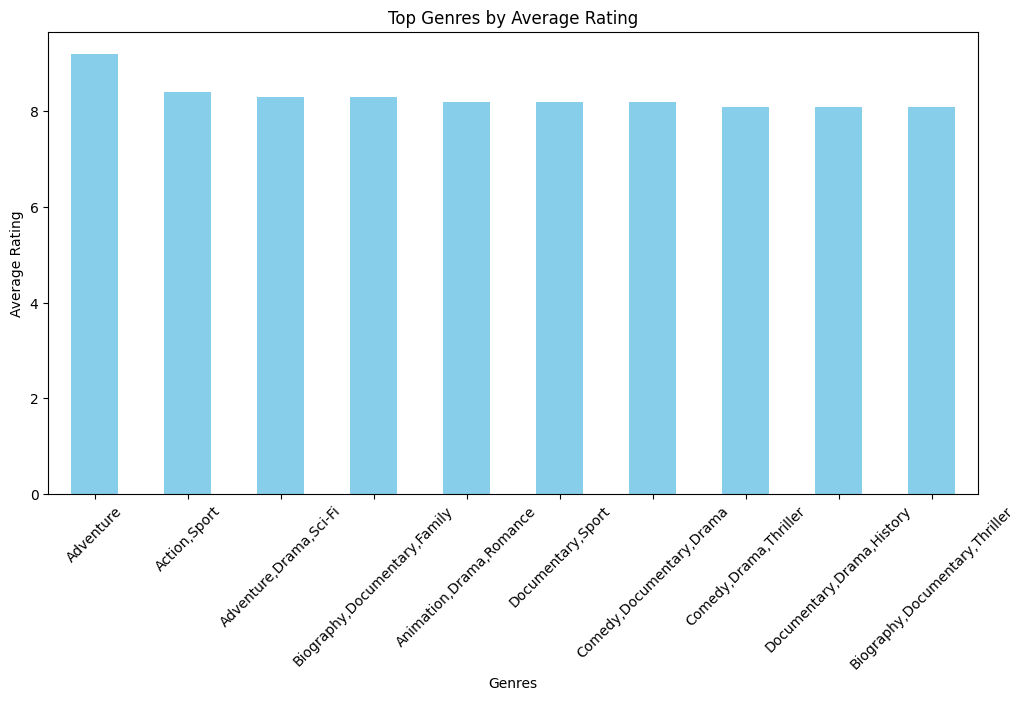

In [31]:
# Identify genres with highest average ratings
genre_ratings = combined_data.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head(10)

# Visualize top genres by average rating
plt.figure(figsize=(12, 6))
genre_ratings.plot(kind='bar', color='skyblue')
plt.title('Top Genres by Average Rating')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# Other recommendations based on further analysis...


### Exploring the Relationship Between Runtime and Average Rating

We can explore how the runtime of a movie correlates with its average rating.

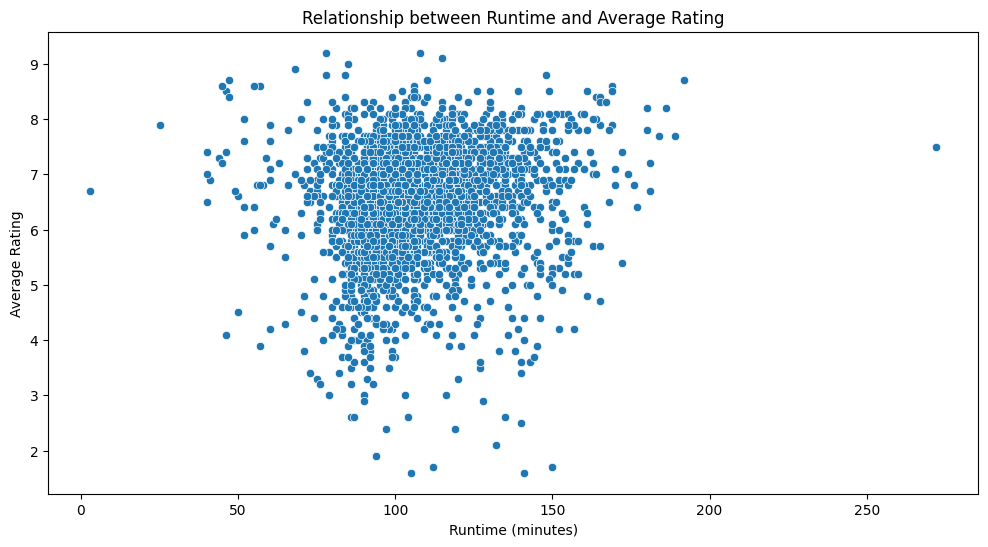

In [32]:
# Example of exploring runtime vs. average rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='runtime_minutes', y='averagerating', data=combined_data)
plt.title('Relationship between Runtime and Average Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.show()


###CONCLUSION
The study shows that Microsoft's new studio should focus on genres with higher average ratings for increased film success. Optimizing investment in high-performing genres and generations is essential, thus strategic budget allocation to each genre demands careful consideration that can drive the maximum leverage for box office returns. Moreover, the IPs are also on board to target runtimes that cater audience experience even better with critical acclaim. In proceeding with these elements of VPF— genre preferences, budget investment; run-time —the studio can undergo a better-utilized approach to the film industry and have data-driven results as their voice.